In [1]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
#might want 3D stuff later
#from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from matplotlib import style, rcParams

#Import in-house code
from simulation import gravity_acceleration, quiver_acceleration, simulate_mechanics, to_rotational
from plotting import plot_solution, get_acc_quivers, animate_solution, plot_sol3d, animate_sol3d

#%matplotlib notebook
#%matplotlib inline

style.use('seaborn')
rcParams['figure.figsize'] = 10, 10

## Tasks

### TODO:
- play around with using different masses
- Extend animation, 3d plotting and animation code to handle n-bodies and multiple massless third bodies per solution

### DONE:
- 3d plotting and animation
- code to change coordinates from xyz to rotational coordinates [MIT courseware reference](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec18.pdf)

According to [this](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec18.pdf), the solution ot the motion of the first and second bodies is the Kepler problem, where the two bodies move in circular orbits about their center of mass with a frequency

$$\Omega = \sqrt{\frac{G(M_1+M_2)}{R^3}}$$

where $R$ is the distance between them. We can convert the xyz positions, velocities, and accelerations into a rotational coordinate frame centered at the center of mass of the system and rotating with angular velocity $\Omega$. In this coordinate system $M_1$ and $M_2$ stay at rest (their velocities $v_1$ and $v_2$ are canceled out by rotating the coordinate system by subtracting $\Omega r_1$ and $\Omega r_2$.

In practice, we can use the change in the solution for the first body's movement to find how much to rotate the coordinates, construct a rotation matrix, and use the rotation matrix to modify the position of the third body. Supposing we have already found the position of the center of mass of the system and subtracted off its position so our coordinates are already centered around the origin, we can find the rotation $\theta$ of the first body over time (compared to its initial position) by using a 2-argument arctangent: $\theta(t_i) = \arctan{(y_1(t_i)-y_1(t_0), x_1(t_i)-x_1(t_0)}$ in numpy `np.arctan2(y,x)`. (Using 2 arguments allows us to determine the correct quandrant for $\theta$). Now we will set the first two bodies positions constant based on their initial positions and rotate the third body by $-\theta(t_i)$ for each time step. This can be accomplished nicely by matrix multiplying a rotational matrix based off $-\theta_i = -\theta(t_i)$ to the x,y position vector of the third body at each time step:

$$R(-\theta_i) = \begin{bmatrix}
\cos{\theta_i} & \sin{\theta_i} \\
-\sin{\theta_i} & \cos{\theta_i}
\end{bmatrix}
$$

Because we are rotating our coordinates around the origin, we can use the same rotation matrix to convert our velocities into rotating coordinate velocities. If the center of mass has a velocity, we must subtract off that velocity from every bodies' velocity before rotating.

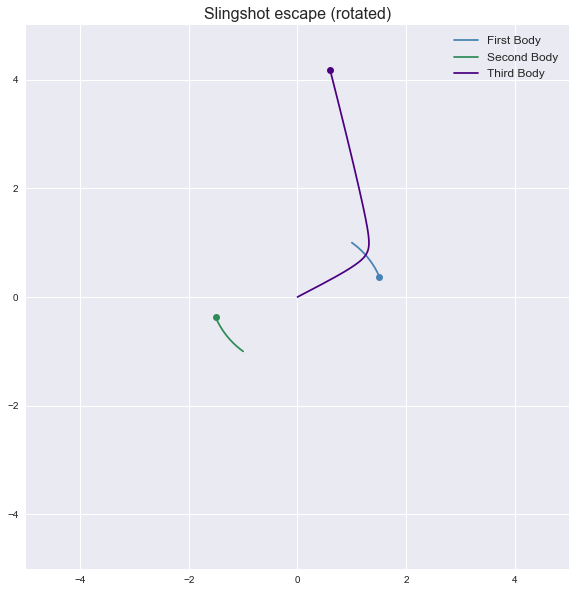

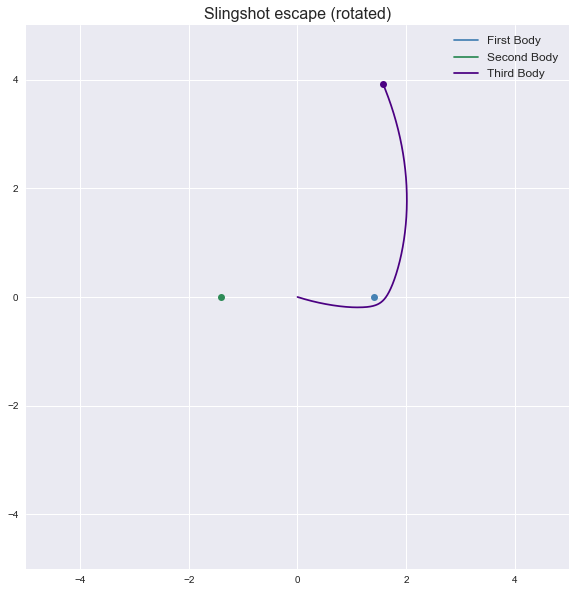

In [2]:
# Set up initial conditions and parameters (Modified from "Best Attempt")
t0 = 0
tf = 2
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, 0, # Position 3
                 0.35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2.5, 1.3, 0]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y
#sol[6, :] = 0
#sol[7, :] = 1
rot_sol, center = to_rotational(sol)

title = 'Slingshot escape (rotated)'
plot_solution(sol, title, show_speed=False)
plot_solution(rot_sol, title, show_speed=False)

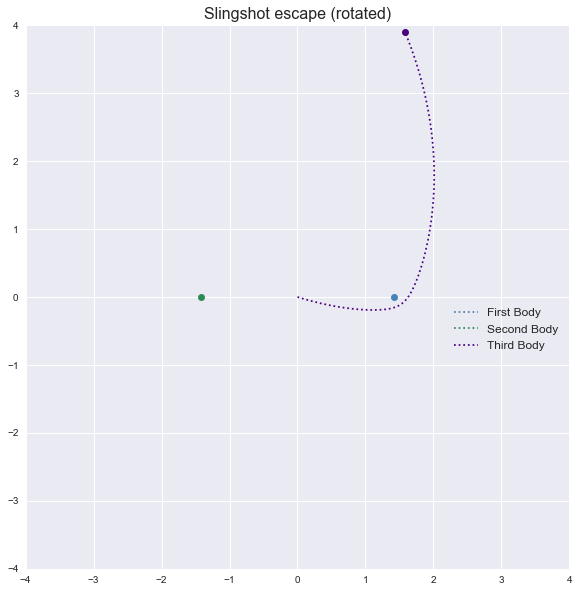

In [3]:
animate_solution(rot_sol, title, "escape_rotated", skip=40, show_quivers=False, show_speed=False)

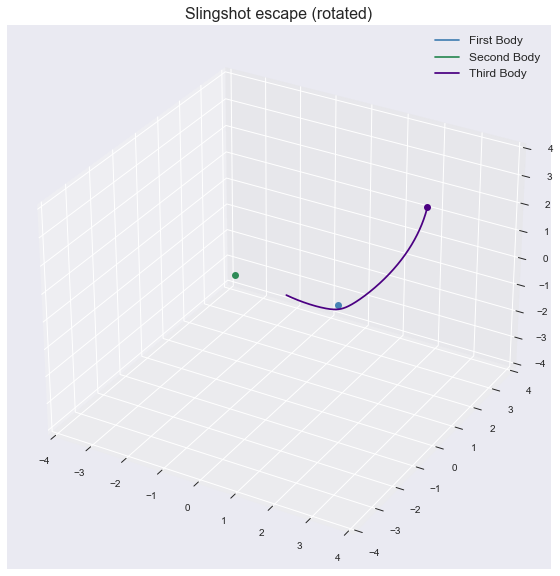

In [4]:
# Set up initial conditions and parameters (Modified from "Best Attempt")
t0 = 0
tf = 2
init = np.array([1, 1, 0, # Position 1
                 -1, -1, 0, # Position 2
                 0, 0, -0.2, # Position 3
                 0.35, -.25, 0, # Velocity/Momentum 1
                 -.35, .25, 0, # Velocity/Momentum 2
                 2.5, 1.3, 0.2]) # Velocity 3 

# Solve the system
sol = solve_ivp(gravity_acceleration, (t0, tf), init, t_eval= np.linspace(t0, tf, 10000)).y
rot_sol, center = to_rotational(sol)

title = 'Slingshot escape (rotated)'
plot_sol3d(rot_sol, title)

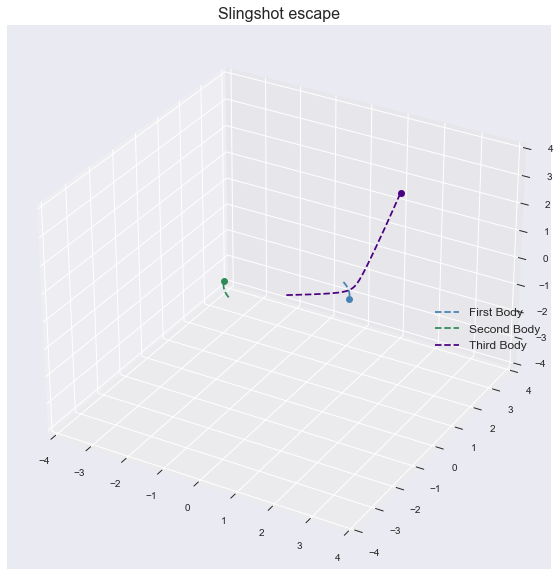

In [5]:
animate_sol3d(sol, "Slingshot escape", "escape", skip=40)
#

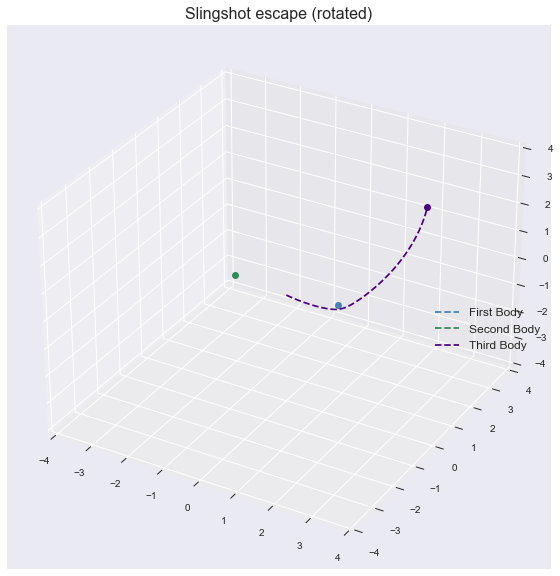

In [6]:
animate_sol3d(rot_sol, title, "escape_rotated", skip=40)

In [9]:
type([]) == list

True